In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
df1 = pd.read_csv("D:\DataScience\Data\Brasile-real-estate-dataset.csv", encoding="ISO-8859-1")
df1.head(5)

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [20]:

df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 12832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11293 non-null  int64  
 1   property_type  11293 non-null  object 
 2   state          11293 non-null  object 
 3   region         11293 non-null  object 
 4   lat            11293 non-null  float64
 5   lon            11293 non-null  float64
 6   area_m2        11293 non-null  float64
 7   price_brl      11293 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 794.0+ KB


In [22]:
df1["price_usd"] = (df1["price_brl"]/3.19).round(2)
df1.drop(columns=["price_brl"],inplace=True)
df1.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_usd
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.46
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.79
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.80
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.79
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.10


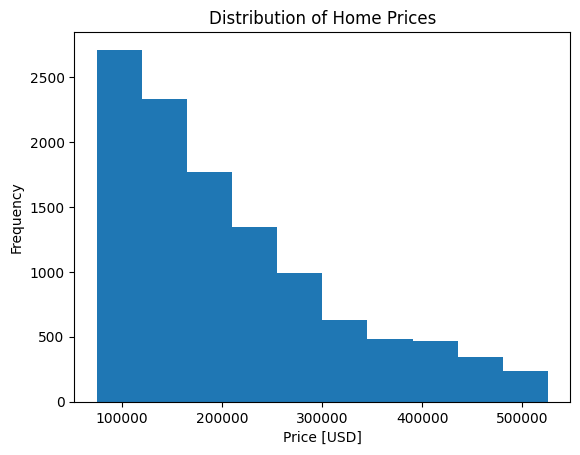

In [25]:
plt.hist(df1["price_usd"]);


# Label axes
plt.xlabel("Price [USD]");
plt.ylabel("Frequency");

# Add title
plt.title("Distribution of Home Prices");


Text(0.5, 1.0, 'Distribution of Home Sizes')

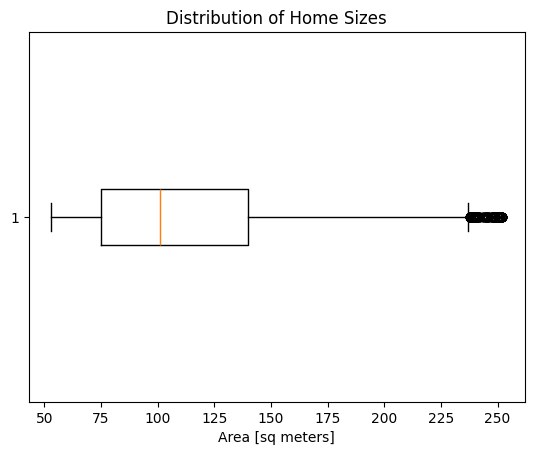

In [26]:
plt.boxplot(df1["area_m2"], vert= False)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

In [28]:
mean_price_by_region = df1.groupby("region") ["price_usd"].mean().sort_values()
mean_price_by_region

region
North        107959.491667
Northeast    182151.781475
South        200989.202960
Southeast    219490.247212
Name: price_usd, dtype: float64

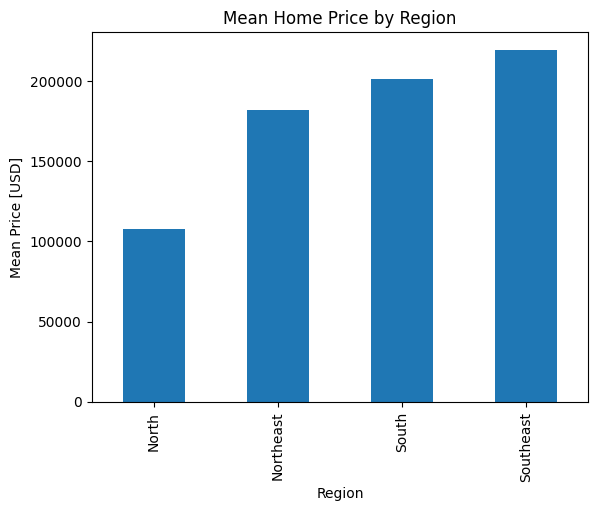

In [29]:
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region"
    );

In [30]:
df_south = df1[df1["region"] == "South"]
df_south.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_usd
743,744,house,Rio Grande do Sul,South,-30.027105,-51.130470,188.0,115770.29
745,746,apartment,Rio Grande do Sul,South,-30.039816,-51.223164,65.0,123430.14
746,747,apartment,Rio Grande do Sul,South,-29.696850,-53.858382,142.0,185145.22
748,749,apartment,Rio Grande do Sul,South,-30.033820,-51.198596,151.0,256572.00
750,751,apartment,Rio Grande do Sul,South,-30.034061,-51.135494,68.0,75957.01


In [31]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Name: count, dtype: int64

Text(0.5, 1.0, 'Rio Grande do Sul: Price vs. Area')

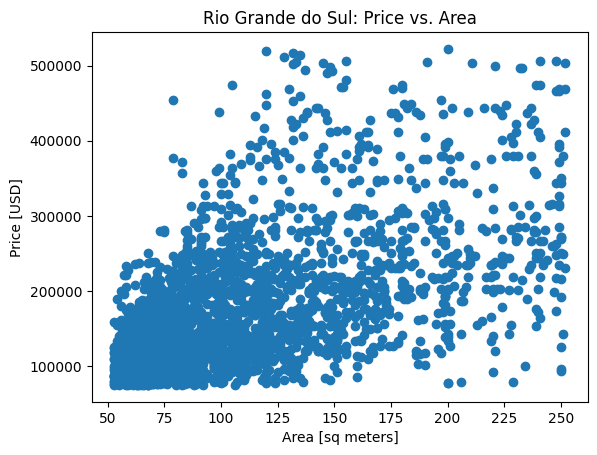

In [32]:
df_south_rgs = df_south[df_south["state"] == "Rio Grande do Sul"]

# Build scatter plot
plt.scatter(x=df_south_rgs["area_m2"], y=df_south_rgs["price_usd"]);


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")



# Add title
plt.title("Rio Grande do Sul: Price vs. Area")

In [33]:
# Get unique states in the South region
south_states = df_south["state"].unique()

# Compute correlation for each state
south_states_corr = {
    state: df_south[df_south["state"] == state]["area_m2"].corr(df_south[df_south["state"] == state]["price_usd"])
    for state in south_states
}

# Display the dictionary
south_states_corr


{'Rio Grande do Sul': 0.5773267433871903, 'Santa Catarina': 0.5068121769989855}